<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error 344757664.36
Mean Squared Error (CV-2 Fold): 369889121.79
Mean Squared Error (CV-3 Fold): 374324680.22
Mean Squared Error (CV-4 Fold): 358710412.58
Mean Squared Error (CV-5 Fold): 364340352.02


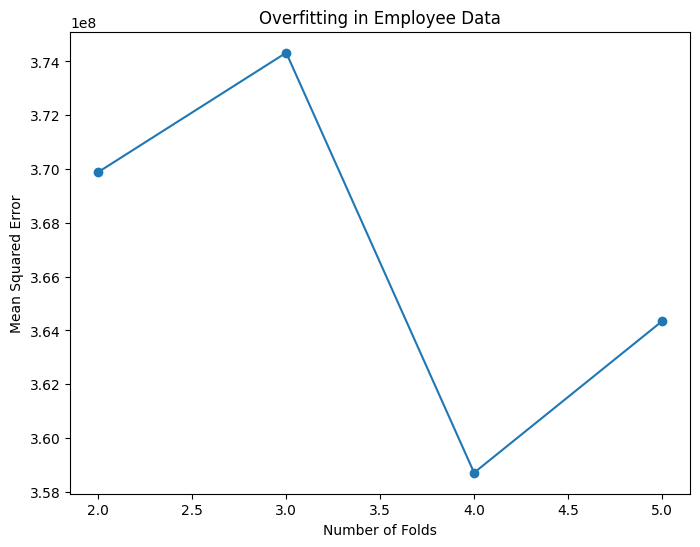

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Load the data
data = pd.read_csv("/content/sample_data/Employee.csv")

# Define the features and target variable
x = data.age.values.reshape(-1, 1)
y = data.salary.values.reshape(-1, 1)

# Initialize the model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Predict using the model
y_pred = model.predict(x)

# Calculate the mean squared error on the full dataset
full_data_mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error {full_data_mse:.2f}")

# Perform cross-validation with different training set sizes
cv_folds = [2, 3, 4, 5]
cv_results = {}

for folds in cv_folds:
    cv = KFold(n_splits=folds, shuffle=True, random_state=42)
    cv_mse = cross_val_score(model, x, y, cv=cv, scoring='neg_mean_squared_error')
    cv_results[folds] = -cv_mse.mean()  # Negate the values to get positive MSE
    print(f"Mean Squared Error (CV-{folds} Fold): {cv_results[folds]:.2f}")

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(list(cv_results.keys()), list(cv_results.values()), marker='o')
plt.title('Overfitting in Employee Data')
plt.xlabel('Number of Folds')
plt.ylabel('Mean Squared Error')
plt.show()
